Приоритизируем данные гипотезы. Запустим А/В тест и проанализируем результаты. В файле hypothesis 9 гипотез по увеличению выручки интернет-магазина с указаными параметрами Reach, Impact, Confidence, Effort. Решим следущие задачи.


Применим фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Применим фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Анализ A/B-теста

Описание данных

Данные для первой части

Файл /datasets/hypothesis.csv. Скачать датасет

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv. Скачать датасет

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt

from pandas.plotting import register_matplotlib_converters
import warnings
from collections import defaultdict
import matplotlib.pyplot as plt

Посмотрим данные в файле ('hypothesis.csv')

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Посмотрим данные в файле 'orders.csv'

In [3]:
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [4]:
#Посмотрим информацию таблицы orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
#Посмотрим дубликаты таблицы orders
orders[orders.duplicated() == True]

,transactionId,visitorId,date,revenue,group


Посмотрим данные в файле 'visitors.csv'

In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [7]:
#Посмотрим информацию таблицы visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
#Посмотрим дубликаты таблицы visitors
visitors[visitors.duplicated() == True]

,date,group,visitors


Все данные в таблицах изучены, пропущенных значений нет и дубликатов тоже

 Расчет приоритизации (использование методики ICE):

In [9]:
pd.options.display.max_colwidth = 1
hypothesis['priority_ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.round(2).sort_values(by='priority_ICE')
hypothesis.index = range(len(hypothesis))
hypothesis_ICE = hypothesis[['Hypothesis', 'priority_ICE']].reset_index()
hypothesis_ICE.columns = ['ICE_order', 'Hypothesis', 'priority_ICE']
hypothesis_ICE['ICE_order'] += 1
hypothesis_ICE

,ICE_order,Hypothesis,priority_ICE
0,1,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00
1,2,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
2,3,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,4,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
4,5,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
5,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
6,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
7,8,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
8,9,"Запустить акцию, дающую скидку на товар в день рождения",16.20


 Расчет приоритизации (использование методики RICE):

In [10]:
pd.options.display.max_colwidth = 1
hypothesis['priority_RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis = hypothesis.round(2).sort_values(by='priority_RICE')
hypothesis.index = range(len(hypothesis))
hypothesis_RICE = hypothesis[['Hypothesis', 'priority_RICE']].reset_index()
hypothesis_RICE.columns = ['RICE_order', 'Hypothesis', 'priority_RICE']
hypothesis_RICE['RICE_order'] += 1
hypothesis_RICE.sort_values(by = 'priority_RICE', ascending=False)

,RICE_order,Hypothesis,priority_RICE
8,9,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
7,8,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
5,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
6,7,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
4,5,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,2,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
2,3,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
0,1,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


 Сравнительный анализ:

In [11]:
pd.options.display.max_colwidth = 1
df_common = hypothesis_ICE.merge(hypothesis_RICE, on='Hypothesis').sort_values(by='priority_ICE', ascending=False)
df_common = df_common[['Hypothesis', 'ICE_order', 'RICE_order']]
df_common['Short_descr'] = ['Акция скидка ДР', '+2 канала трафика', 'Подписка', 'Баннеры акций', 'Блоки реком-ий', 
                            'Служба доставки', 'Страница отзывов', 'Стр-ра категорий', 'Цвет фона']
df_common

,Hypothesis,ICE_order,RICE_order,Short_descr
8,"Запустить акцию, дающую скидку на товар в день рождения",9,5,Акция скидка ДР
7,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",8,7,+2 канала трафика
6,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,9,Подписка
5,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",6,6,Баннеры акций
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",5,8,Блоки реком-ий
3,"Запустить собственную службу доставки, что сократит срок доставки заказов",4,3,Служба доставки
2,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,Страница отзывов
1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",2,4,Стр-ра категорий
0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,1,Цвет фона


Итог:
параметр охвата (Reach), использующийся в методе RICE изменил всю приоритетность, полученную по методу ICE:

без учета охвата на первом месте идет акция со скидкой имениннику, но параметр Reach справедливо понизил приоритет этой акции, т.к. и правда, охват её минимальный (по сравнению с другими гипотезами увеличения выручки);

также произошло и с гипотезой о добавлении 2х каналов трафика, с организацией своей службы доставки и с идеей о добавлении страницы отзывов;

без изменений осталась рейтинговая позиция гипотез о добавлении баннеров с актуальными акциями на главную страницу и идея с изменением цвета фона главной страницы);

выросли в рейтинге (стали более приоритетными) RICE (по сравнению с ICE) гипотеза о добавлении формы подписки на все основные страницы ресурса, о добавлении блоков рекомендаций товаров и предложение об изменении структуры категорий.

2. Анализ A/B-теста

Но если выбрать опцию для отображения параметр Full_df и отсортировать датафрейм по visitorId, то мы сразу же заметим, что есть пользователи, которые относятся как к группе А, так и к группе B (например, id пользователя 8300375).


Оценим сколько у нас таких пользователей:

In [12]:
# формируем группу риска (пользователи с более чем 1 заказом)

sizes = orders.groupby(['visitorId', 'group']).size().reset_index()
sizes.columns = ['visitorId', 'group', 'count']
sizes = sizes.query('count > 1').sort_values(by='visitorId')
sizes.head()

,visitorId,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2


Формируем словарь "пользователь - группы, в которых он появлялся" и если одному пользователю принадлежит более 1 значения групп, добавляем его в список broken_users:

In [13]:

potentially_broken_users_list = list(zip(sizes['visitorId'], sizes['group']))
potentially_broken_users_dict = defaultdict(list)
for user, group in potentially_broken_users_list:
    potentially_broken_users_dict[user].append(group)

broken_users = [user for user in potentially_broken_users_dict if len(potentially_broken_users_dict[user]) > 1]
print('Пользователи, которые видели обе версии сайта: ', ', '.join(str(el) for el in broken_users))

Пользователи, которые видели обе версии сайта:  1230306981, 2038680547, 2378935119, 2458001652, 4256040402


In [14]:
broken_users

[1230306981, 2038680547, 2378935119, 2458001652, 4256040402]

Посмотрим данные по ним по датафрейму orders

In [15]:
broken_orders = orders.query('visitorId in @broken_users')
print('Количество строк в датафрейме orders по этим пользователям: {}'.format(broken_orders.shape[0]))
broken_orders.info()

Количество строк в датафрейме orders по этим пользователям: 44
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 32 to 1091
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  44 non-null     int64 
 1   visitorId      44 non-null     int64 
 2   date           44 non-null     object
 3   revenue        44 non-null     int64 
 4   group          44 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


Посмотрим, сколько заказов они сделали, на какую сумму и по каким группам:

In [16]:
broken_orders_grouped = (broken_orders
                        .groupby(['visitorId', 'group', 'date'])
                        .agg({'transactionId': 'nunique', 'revenue': 'sum'})
                   )
broken_orders_grouped.head()

transactionId  revenue
visitorId  group date                              
1230306981 A     2019-08-09  3              18440  
           B     2019-08-09  2              12840  
2038680547 A     2019-08-04  2              4070   
                 2019-08-17  1              3470   
                 2019-08-22  1              760

Они сделали в общей сложности 44 заказа и принесли компании немало выручки. Получается, что данные "испорчены" этими пользователями.

В связи с этим, создадим копии наших основных датафреймов orders и visitors и в них уберем данные по этим пользователям из датафрейма orders и для корректности из таблицы visitors удалим по 1 broken-посетителю в соответствующих группах и в соответствии с датами, полученными выше. В конце выполнения задачи, рассчитаем стат. значимость для обоих наборов данных: с этими "неправильными" пользователями и без них, - чтобы проследить, влияют ли они на конечный результат.

In [17]:
#(2)
orders_grouped = (orders
                        .groupby(['visitorId'])
                        .agg({'group': 'nunique'})
                        .reset_index()
                   )
orders_grouped = orders_grouped.query('group > 1').sort_values(by='visitorId')
orders_grouped.head()

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


In [18]:
#(2)
potentially_broken_users_list1 = list(orders_grouped['visitorId'])
len(potentially_broken_users_list1)

58

In [19]:
#(2)
orders_grouped_f = orders.query('visitorId in @potentially_broken_users_list1 ')
orders_grouped_f.head()

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A


In [20]:
orders_grouped_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 2 to 1195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  181 non-null    int64 
 1   visitorId      181 non-null    int64 
 2   date           181 non-null    object
 3   revenue        181 non-null    int64 
 4   group          181 non-null    object
dtypes: int64(3), object(2)
memory usage: 8.5+ KB


In [21]:
#Посмотрим, сколько заказов они сделали, на какую сумму и по каким группам:(2)
broken_orders_grouped1 = (orders_grouped_f
                        .groupby(['visitorId', 'group', 'date'])
                        .agg({'transactionId': 'nunique', 'revenue': 'sum'})
                   )
broken_orders_grouped1.head()

transactionId  revenue
visitorId group date                              
8300375   A     2019-08-07  1              1790   
          B     2019-08-01  1              10510  
199603092 A     2019-08-12  1              6438   
                2019-08-15  1              3488   
                2019-08-22  1              6976

Чистим датафреймы:

orders:

In [22]:
orders_filt = orders.query('visitorId not in @potentially_broken_users_list1')
orders_filt

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


visitors:
Сначала добавим к нашему кастомному датафрейму столбец count, где проставим значение -1, и возьмем только столбцы group, date и count:

In [23]:
broken_orders_grouped1 = broken_orders_grouped1.reset_index()
broken_orders_grouped1['count'] = -1
broken_orders_grouped1 = broken_orders_grouped1[[ 'date', 'count','group' ]]
print(broken_orders_grouped1.info())
broken_orders_grouped1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    170 non-null    object
 1   count   170 non-null    int64 
 2   group   170 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.1+ KB
None


,date,count,group
0,2019-08-07,-1,A
1,2019-08-01,-1,B
2,2019-08-12,-1,A
3,2019-08-15,-1,A
4,2019-08-22,-1,A


Объединим наш начальный датайфрейм visitors с полученным выше:

In [24]:
visitors_filt = visitors.merge(broken_orders_grouped1, on=['date', 'group'], how='left').fillna(0)
visitors_filt.head()

,date,group,visitors,count
0,2019-08-01,A,719,-1.0
1,2019-08-02,A,619,-1.0
2,2019-08-03,A,507,0.0
3,2019-08-04,A,717,-1.0
4,2019-08-04,A,717,-1.0


Теперь добавим новый столбец, где построчно просуммируем значения столбцов visitors и count:

In [25]:
visitors_filt['visitors_'] = visitors_filt['visitors'] + visitors_filt['count']
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Отбросим старый столбец visitors и вспомогательный столбец count, переименуем новый столбец visitors_ в visitors:

In [26]:
visitors_filt = visitors_filt.drop(['visitors', 'count'], axis=1)
visitors_filt.columns = ['date', 'group', 'visitors']
visitors_filt['visitors'] = visitors_filt['visitors'].astype(int)
visitors_filt.head()

,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,618
2,2019-08-03,A,507
3,2019-08-04,A,716
4,2019-08-04,A,716


Готово. Датафрейм visitors тоже почищен от заранее некорректных данных.

1 Кумулятивная выручка в разбивке по группам:

In [27]:
cum_rev = orders_filt.groupby(['group', 'date'])['revenue'].sum().groupby(level=[0]).cumsum().to_frame()
cum_rev = cum_rev.reset_index()
cum_rev['date'] = cum_rev['date'].apply(lambda x: x.split('-')[2] + '-' + x.split('-')[1])
cum_rev.head()

,group,date,revenue
0,A,01-08,142779
1,A,02-08,234381
2,A,03-08,346854
3,A,04-08,388030
4,A,05-08,474413


In [28]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_filt[['date','group']].drop_duplicates() 

In [29]:
## получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders_filt[
        np.logical_and(
            orders_filt['date'] <= x['date'], orders_filt['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [30]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [31]:
#получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors_filt[
        np.logical_and(
            visitors_filt['date'] <= x['date'], visitors_filt['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [32]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,718
1,2019-08-01,B,17,17,59758,2136
2,2019-08-02,A,42,36,234381,1336
3,2019-08-02,B,40,39,221801,2716
4,2019-08-03,A,66,60,346854,1843


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

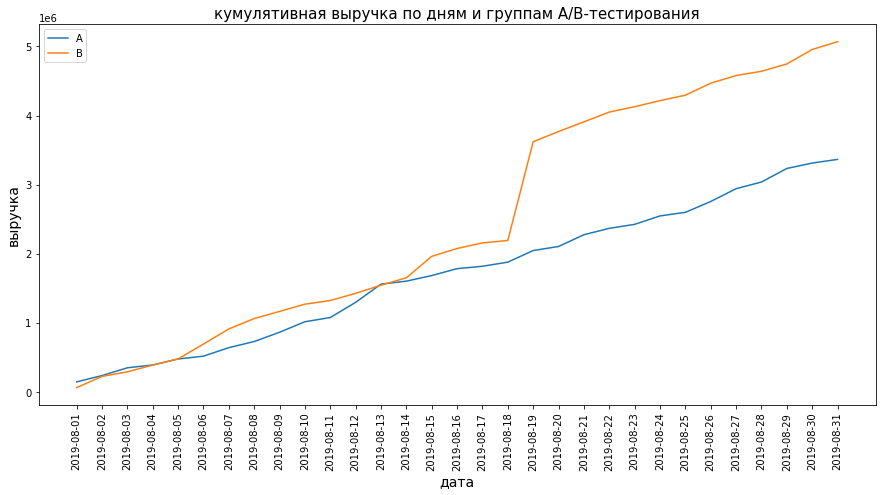

In [33]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');

# Строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');

plt.xlabel('дата', fontsize=14)
plt.ylabel('выручка', fontsize=14)
plt.xticks(rotation=90)
plt.title('кумулятивная выручка по дням и группам A/B-тестирования', fontsize=15)
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки в В группе в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

2 Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

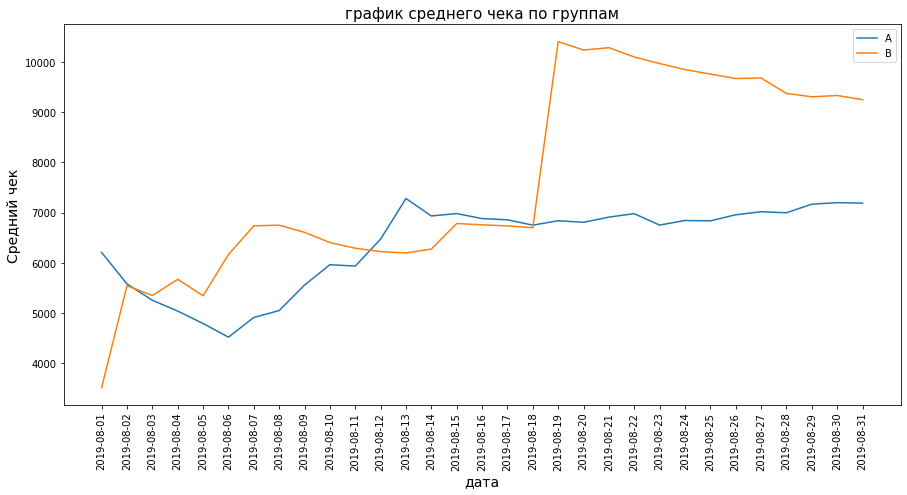

In [34]:
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('дата', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.xticks(rotation=90)
plt.title('график среднего чека по группам', fontsize=15)
plt.legend();

Средний чек тоже становится равномерным ближе к концу теста: установился для группы А и продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

3 Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() 

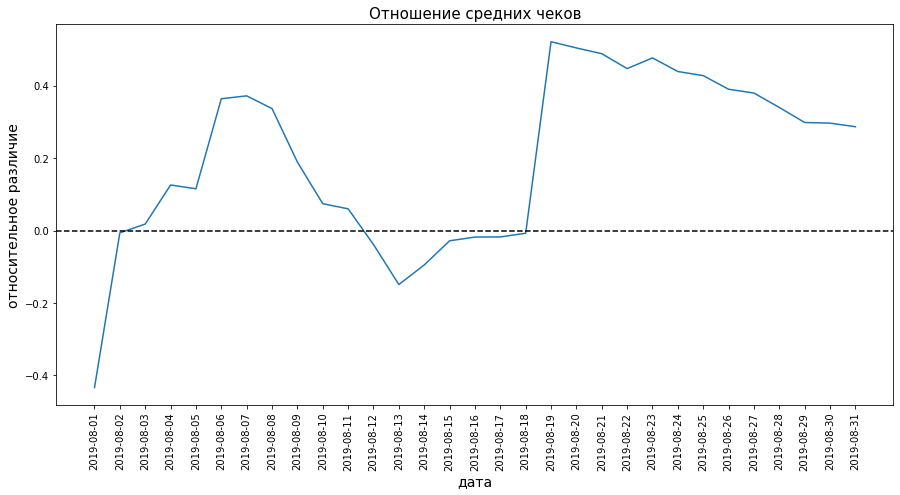

In [35]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('дата', fontsize=14)
plt.ylabel('относительное различие', fontsize=14)
plt.xticks(rotation=90)
plt.title('Отношение средних чеков', fontsize=15);


В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.

4 Проанализируем график кумулятивной конверсии. 

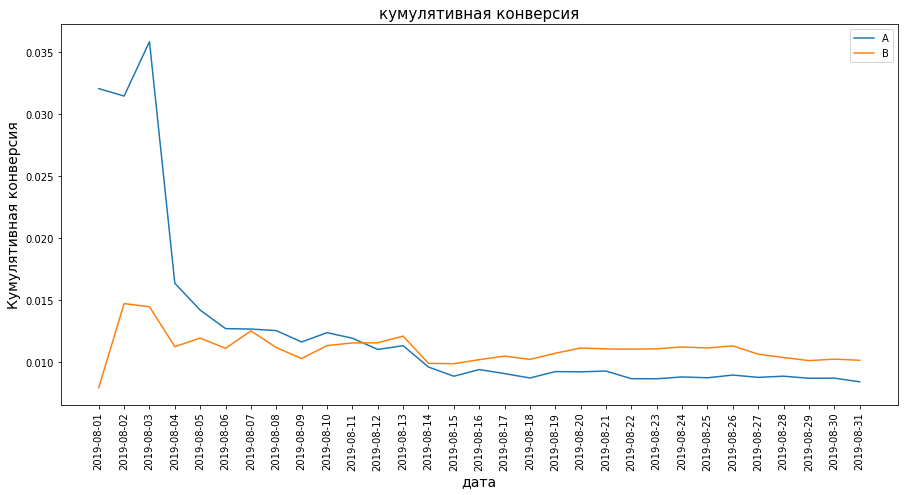

In [36]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('дата', fontsize=14)
plt.ylabel('Кумулятивная конверсия', fontsize=14)
plt.xticks(rotation=90)
plt.title('кумулятивная конверсия', fontsize=15)
plt.legend();


Симметричный график получился! Группы колебались, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

5 Построим график относительного различия кумулятивных конверсий:

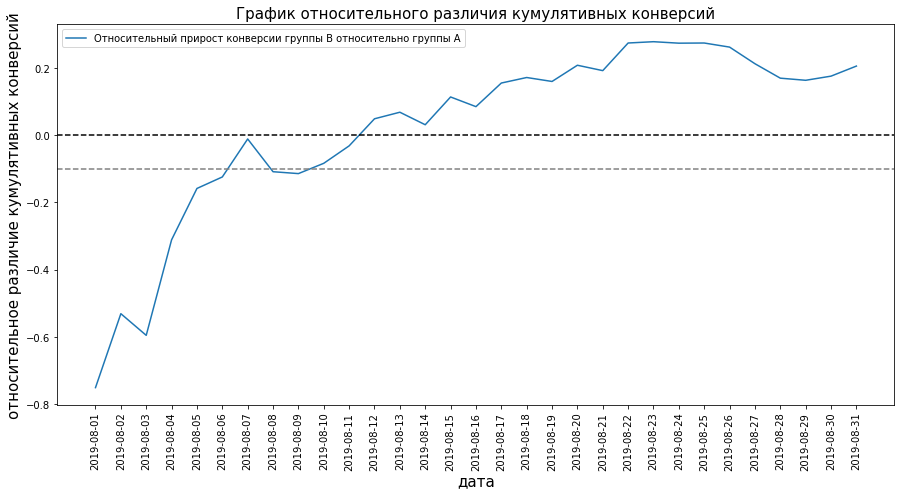

In [37]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel('дата', fontsize=15)
plt.ylabel('относительное различие кумулятивных конверсий', fontsize=15)
plt.xticks(rotation=90)
plt.title('График относительного различия кумулятивных конверсий', fontsize=15)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину

6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

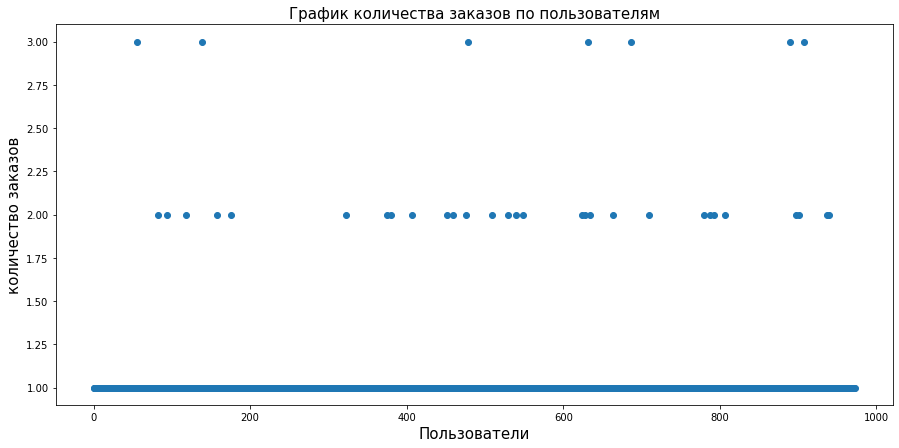

In [38]:
ordersByUsers = (
   orders_filt.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,7))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.xlabel('Пользователи', fontsize=15)
plt.ylabel('количество заказов', fontsize=15)
plt.title('График количества заказов по пользователям', fontsize=15);

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2 заказами тоже значительна.

7 Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [39]:
print(np.percentile(ordersByUsers['transactionId'], [95,99]))

[1. 2.]


Большая часть клиентов сделали по 1 заказу.
95ый перцентиль равен 1 заказам, 99ый - 2.

8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.


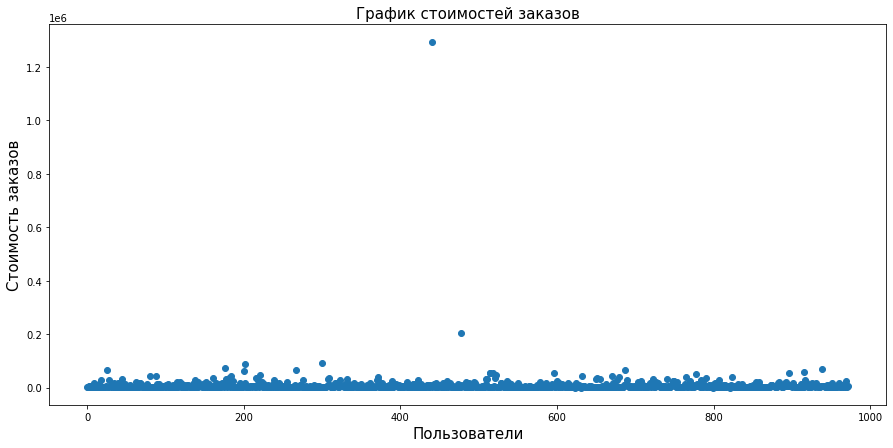

In [40]:
ordersByrevenue = (
   orders_filt.groupby('visitorId', as_index=False)
    .agg({'revenue': 'sum'})
)
x_values = pd.Series(range(0,len(ordersByrevenue)))
plt.figure(figsize=(15,7))
plt.scatter(x_values, ordersByrevenue['revenue']) 
plt.xlabel('Пользователи', fontsize=15)
plt.ylabel('Стоимость заказов', fontsize=15)
plt.title('График стоимостей заказов', fontsize=15);

In [41]:
ordersByrevenue

,visitorId,revenue
0,5114589,570
1,6958315,1490
2,11685486,6201
3,39475350,3990
4,47206413,730
...,...,...
968,4259830713,3190
969,4278982564,24744
970,4279090005,6716
971,4281247801,2640


9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [42]:
print(np.percentile(ordersByrevenue['revenue'], [95,99]))

[28910. 59082.]


Сумма по большей части заказов не превышает 28910 рублей. Есть выбросы и до 1,3 млн, но это что-то очень интересное. Вполне возможно, что это один из тех клиентов, которые совершили по 11 заказов.
95ый процентиль равен приблизительно 28910 рублей, 99ый - 59082 руб.

10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.

In [43]:

visitorsADaily = visitors_filt[visitors_filt['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors_filt[visitors_filt['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders_filt[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders_filt[orders_filt['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(20)

/tmp/ipykernel_240/3460513467.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orders_filt[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,718,712,718,2136
1,2019-08-01,23,142779,17,59758,23,142779,17,59758,718,712,718,2136
2,2019-08-01,23,142779,17,59758,23,142779,17,59758,718,712,718,2136
3,2019-08-01,23,142779,17,59758,23,142779,17,59758,718,712,718,2136
4,2019-08-01,23,142779,17,59758,23,142779,17,59758,718,712,718,2136
5,2019-08-01,23,142779,17,59758,23,142779,17,59758,718,712,718,2136
6,2019-08-01,23,142779,17,59758,23,142779,17,59758,718,712,718,2136
7,2019-08-01,23,142779,17,59758,23,142779,17,59758,718,712,718,2136
8,2019-08-01,23,142779,17,59758,23,142779,17,59758,718,712,718,2136
9,2019-08-02,19,91602,23,162043,42,234381,40,221801,618,580,1336,2716


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [44]:
ordersByUsersA = (
    orders_filt[orders_filt['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders_filt[orders_filt['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Создадим объект pd.Series нужной длины:

In [45]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0          0
1          0
2          0
3          0
4          0
          ..
4588983    0
4588984    0
4588985    0
4588986    0
4588987    0
Name: orders, Length: 4588988, dtype: int64

In [46]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 440    1
 441    1
 442    1
 443    1
 444    1
 Name: orders, Length: 445, dtype: int64,
 0          0
 1          0
 2          0
 3          0
 4          0
           ..
 4588983    0
 4588984    0
 4588985    0
 4588986    0
 4588987    0
 Name: orders, Length: 4588988, dtype: int64]

In [47]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть. Уровень статистической значимости, alpha = 0,05

In [48]:

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [49]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.962
0.174


Вывод: По «сырым» данным различий в конверсии групп A и B нет.
Первое число — p-value = 0.962 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами не отвергаем. Однако относительный выигрыш группы B равен 17,4 %.

Найдём относительные различия в среднем чеке между группами по "сырым" данным.

In [50]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_filt[orders_filt['group']=='A']['revenue'], orders_filt[orders_filt['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_filt[orders_filt['group']=='B']['revenue'].mean()/orders_filt[orders_filt['group']=='A']['revenue'].mean()-1))

0.829
0.287


P-value значительно больше 0.05. Значит, что статистически значимых различий в конверсии между группами не отвергаем. .  Средний чек группы B значительно ниже среднего чека группы A.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 59082 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 59082 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [51]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 59082]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
17


Всего 17 аномальных пользователей.

In [52]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [53]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.959
0.206


Результаты по конверсии практически не изменились. нулевую гипотезу о том, что статистически значимых различий в конверсии между группами есть,не отвергаем. Относительный выигрыш группы B равен 20,6 %.

Результаты по конверсии практически не изменились. Произошло ли что-нибудь с результатами по среднему чеку?

In [54]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_filt[
                np.logical_and(
                    orders_filt['group'] == 'A',
                    np.logical_not(orders_filt['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders_filt[
                np.logical_and(
                    orders_filt['group'] == 'B',
                    np.logical_not(orders_filt['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders_filt[
            np.logical_and(
                orders_filt['group'] == 'B',
                np.logical_not(orders_filt['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_filt[
            np.logical_and(
                orders_filt['group'] == 'A',
                np.logical_not(orders_filt['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.827
-0.017


P-value увеличился, но и разница между сегментами сократилась с 17% до 1,7%.

Сравним эти результаты с теми, которые мы получили бы, если бы изначально не убирали пользователей, которые одновременно относятся как к группе А, так и к группе В:

In [55]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [56]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [57]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [58]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [59]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [60]:

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [61]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Вывод: По «сырым» данным различий в конверсии (без удаления пользователей), групп A и B нет. Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет,отвергаем. Однако относительный выигрыш группы B равен 13,8 %.

In [62]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно ниже среднего чека группы A.

In [63]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 67750]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
dtype: int64
27


Всего 27 аномальных пользователей.

In [64]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [65]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.012
0.169


Результаты по конверсии практически не изменились. нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет,отвергаем. Относительный выигрыш группы B равен 16,9 %.

In [66]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.705
-0.057


P-value увеличился, но и разница между сегментами сократилась с 17% до 6%.

#Результаты если бы изначально не убирали пользователей

P-value по конверсии до очистки данных (без удаления сомнительных пользователей): 0,017

Отношения средних B/A по конверсии (до очистки данных): 0,138

P-value по конверсии после очистки данных: 0.012

Отношения средних B/A по конверсии (после очистки данных): 0,169

P-value по среднему чеку до очистки данных: 0.729

Отношения средних B/A по среднему чеку (до очистки данных): 0,259

P-value по среднему чеку после очистки данных: 0.705

Отношения средних B/A по среднему чеку (после очистки данных): -0,057

#Результаты если убирали пользователей

P-value по конверсии до очистки данных (без удаления сомнительных пользователей): 0,962

Отношения средних B/A по конверсии (до очистки данных): 0,174

P-value по конверсии после очистки данных: 0.829

Отношения средних B/A по конверсии (после очистки данных): 0,287

P-value по среднему чеку до очистки данных: 0.959

Отношения средних B/A по среднему чеку (до очистки данных): 0,206

P-value по среднему чеку после очистки данных: 0.827

Отношения средних B/A по среднему чеку (после очистки данных): -0,017

- по конверсии между группами A и B по сырым данным, нет статистически значимые различия;

- по конверсии между группами A и B по очищенным данным есть статистически значимые различия

- по среднему чеку между группами A и B (как по сырым данным, так и по очищенным) нет статистически значимых различий.

Данный тест можно остановить и считать успешно проведенным. Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между группами не отличается.

Помимо этого, в процессе работы с данными было выяснено, что некоторые пользователи от сессии к сессии могли видеть как одну версию сайта, так и другую, что нарушает один из основных принцип работы A/B-теста - один пользователь видит только одну версию на всём протяжении теста.
В связи с этим, нам необходимо проверить корректность отработки метода показа пользователям одной или другой версии сайта и поправить его, чтобы одному и тому же пользователю показывалась только та версия сайта, которую он увидел при первом визите.

По приоритезации гипотез

Итог: параметр охвата (Reach), использующийся в методе RICE изменил всю приоритетность, полученную по методу ICE:

без учета охвата на первом месте идет акция со скидкой имениннику, но параметр Reach справедливо понизил приоритет этой акции, т.к. и правда, охват её минимальный;

также произошло и с гипотезой о добавлении 2х каналов трафика, с организацией своей службы доставки и с идеей о добавлении страницы отзывов;

без изменений осталась рейтинговая позиция гипотез о добавлении баннеров с актуальными акциями на главную страницу и идея с изменением цвета фона главной страницы);

выросли в рейтинге (стали более приоритетными) RICE (по сравнению с ICE) гипотеза о добавлении формы подписки на все основные страницы ресурса, о добавлении блоков рекомендаций товаров и предложение об изменении структуры категорий.

Данный тест можно остановить и считать успешно проведенным. Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между группами не отличается.